# Test Model

In [32]:
import pandas as pd
from pandas import read_parquet

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_parquet("data_for_model")

In [4]:
df.head()

,datetime,station id,busyness_x,Taxi_Zone_ID,busyness_y,SegmentID,busyness
0,2018-03-04 16:30:00,520.0,0.06,161.0,0.56,257407,0.56
1,2018-03-04 16:30:00,520.0,0.06,161.0,0.56,34178,0.56
2,2018-09-04 17:45:00,520.0,0.06,161.0,0.28,257407,0.28
3,2018-09-04 17:45:00,520.0,0.06,161.0,0.28,34178,0.28
4,2018-09-04 17:45:00,3233.0,0.03,161.0,0.28,257407,0.28


In [10]:
df['average_busyness'] = df[['busyness_x', 'busyness_y', 'busyness']].mean(axis=1)

df = df.rename(columns={
    'busyness_x': 'bike_busyness',
    'busyness_y': 'taxi_busyness',
    'busyness': 'volume_busyness'
})

In [45]:
# Trasnform datetime
def transform_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Create a new column 'weekday' that is the day of the week (0=Monday, 6=Sunday)
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month

    # Create a new column 'minute_of_day' that is the minute of the day in steps of 15 min
    df['time_of_day'] = (df['datetime'].dt.hour * 60 + df['datetime'].dt.minute) / 15

    df['time_of_week'] = (df['datetime'].dt.hour * 60 + df['datetime'].dt.minute) / 15 + 96 * df['weekday']
    return df

df = transform_datetime(df)
df.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness,average_busyness,weekday,time_of_day,time_of_week,month
0,2018-03-04 16:30:00,520.0,0.06,161.0,0.56,257407,0.56,0.393333,6,66.0,642.0,3
1,2018-03-04 16:30:00,520.0,0.06,161.0,0.56,34178,0.56,0.393333,6,66.0,642.0,3
2,2018-09-04 17:45:00,520.0,0.06,161.0,0.28,257407,0.28,0.206667,1,71.0,167.0,9
3,2018-09-04 17:45:00,520.0,0.06,161.0,0.28,34178,0.28,0.206667,1,71.0,167.0,9
4,2018-09-04 17:45:00,3233.0,0.03,161.0,0.28,257407,0.28,0.196667,1,71.0,167.0,9


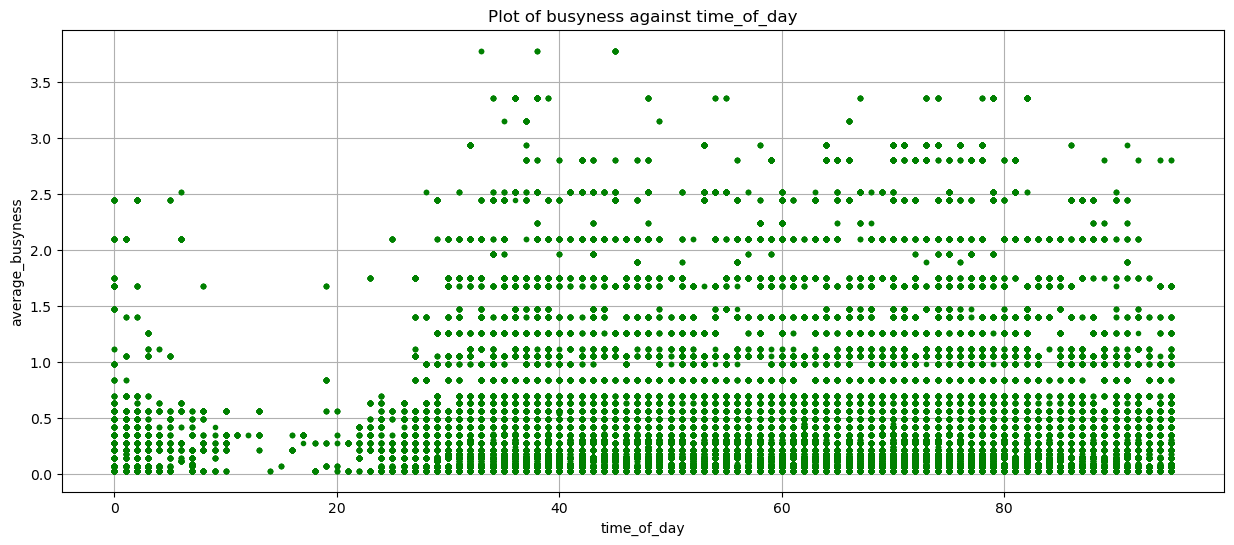

In [29]:
# Plot column 'average_busyness' against 'time_of_week'
plt.figure(figsize=(15, 6))
#plt.plot(df['time_of_day'], df['average_busyness'], 'o', markersize=3, color='red')
#plt.plot(df['time_of_day'], df['bike_busyness'], 'o', markersize=3, color='blue')
plt.plot(df['time_of_day'], df['taxi_busyness'], 'o', markersize=3, color='green')
#plt.plot(df['time_of_day'], df['volume_busyness'], 'o', markersize=3, color='yellow')
plt.xlabel('time_of_day')
plt.ylabel('average_busyness')
plt.title('Plot of busyness against time_of_day')
plt.grid(True)
plt.show()

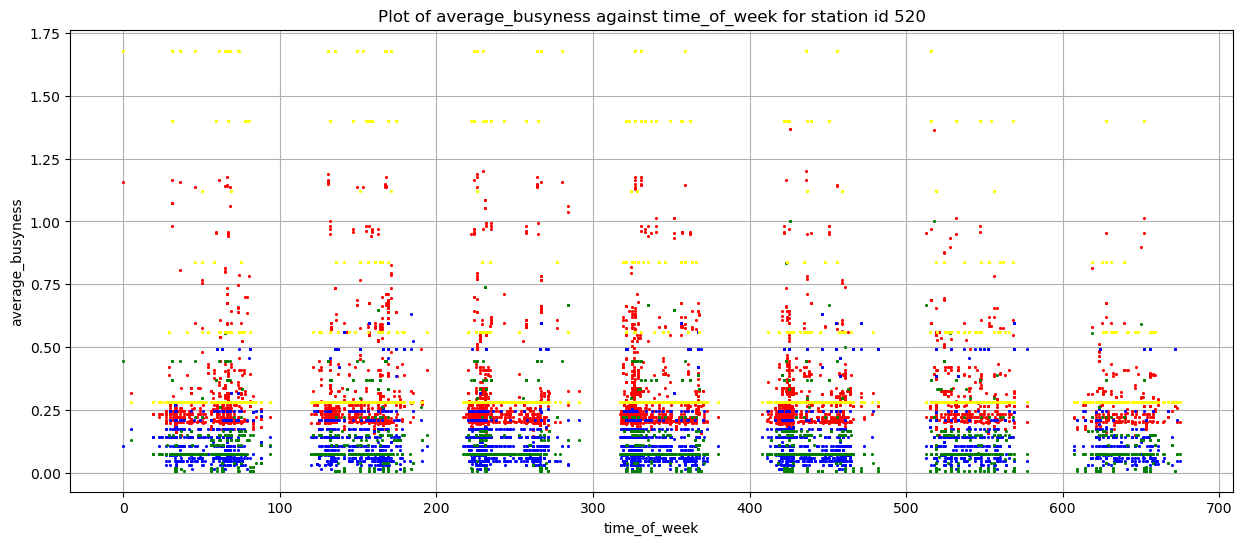

In [30]:
# Filter the dataframe
#df_520 = df.loc[df['Taxi_Zone_ID'] == 161]

# Plot column 'average_busyness' against 'time_of_week'
plt.figure(figsize=(15, 6))
plt.plot(df_520['time_of_week'], df_520['average_busyness'], 'o', markersize=1, color='red')
plt.plot(df_520['time_of_week'], df_520['bike_busyness'], 'o', markersize=1, color='blue')
plt.plot(df_520['time_of_week'], df_520['taxi_busyness'], 'o', markersize=1, color='green')
plt.plot(df_520['time_of_week'], df_520['volume_busyness'], 'o', markersize=1, color='yellow')
plt.xlabel('time_of_week')
plt.ylabel('average_busyness')
plt.title('Plot of average_busyness against time_of_week for station id 520')
plt.grid(True)
plt.show()

In [24]:
df_520["taxi_busyness"].max()

df_520["taxi_busyness"] = df_520["taxi_busyness"] / 3.7799999999999994

/var/folders/ly/rt519r9j7sx5syy44_l85hz80000gn/T/ipykernel_77798/3517399917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_520["taxi_busyness"] = df_520["taxi_busyness"] / 3.7799999999999994


In [25]:
df_520["taxi_busyness"].max()

1.0

#### Dummy Data

In [41]:
df_contribution = pd.read_parquet("contribution_cal")
df_contribution.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness,temp,humidity,snow,windspeed,cloudcover,solarenergy
28696,2018-04-17 16:30:00,127,0.080292,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9
28697,2018-04-17 16:30:00,127,0.080292,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9
28700,2018-04-17 16:30:00,358,0.029197,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9
28701,2018-04-17 16:30:00,358,0.029197,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9
28704,2018-04-17 16:30:00,358,0.000000,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9


In [53]:
df_contribution = transform_datetime(df_contribution)
df_contribution["Taxi_Zone_ID"] = df_contribution["Taxi_Zone_ID"].apply(str)
df_contribution.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness,temp,humidity,snow,windspeed,cloudcover,solarenergy,weekday,month,time_of_day,time_of_week
28696,2018-04-17 16:30:00,127,0.080292,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28697,2018-04-17 16:30:00,127,0.080292,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28700,2018-04-17 16:30:00,358,0.029197,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28701,2018-04-17 16:30:00,358,0.029197,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28704,2018-04-17 16:30:00,358,0.000000,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0


In [65]:
df_zone = df_contribution.loc[df_contribution["Taxi_Zone_ID"] == "170"]
correlation = df_zone.corr()['bike_busyness']
print(correlation)

datetime          -0.000161
station id         0.519729
bike_busyness      1.000000
Taxi_Zone_ID            NaN
taxi_busyness      0.002530
SegmentID         -0.000095
volume_busyness    0.001976
temp               0.005153
humidity          -0.001519
snow              -0.010566
windspeed          0.006099
cloudcover         0.000965
solarenergy       -0.004883
weekday            0.005312
month             -0.002191
time_of_day        0.030248
time_of_week       0.008438
Name: bike_busyness, dtype: float64


In [43]:
dummy_df = pd.read_csv('dummy_data.csv')

In [54]:
taxi_zone = list(df_contribution["Taxi_Zone_ID"].unique())
#taxi_zone = [str(x) for x in taxi_zone] 
print(taxi_zone)

['158', '170', '232', '45', '246', '137', '48', '140', '50', '125', '261', '209']


In [56]:
prediction_models = {}

for zone in taxi_zone:
        df_zone = df_contribution.loc[df_contribution["Taxi_Zone_ID"] == zone]
        X = df_zone.drop(['Taxi_Zone_ID', 'taxi_busyness', 'bike_busyness', 'volume_busyness', 'datetime', 'time_of_week'],axis=1)
        y_taxi = df_zone['taxi_busyness']
        y_bike = df_zone['bike_busyness']
        y_volume = df_zone['volume_busyness']
        
        regr_taxi = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr_taxi.fit(X, y_taxi)

        regr_bike = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr_bike.fit(X, y_bike)

        regr_volume = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr_volume.fit(X, y_volume)

        prediction_models[zone] = [regr_taxi.predict, regr_bike.predict, regr_volume.predict]